In [1]:
pip install imbalanced-learn


In [57]:
import pandas as pd
import plotly.express as px
# Importing libraries necessary for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import IsolationForest
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Model
from imblearn.over_sampling import SMOTE
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from PIL import Image
import math
import io,os
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report,auc




In [3]:
df = pd.read_csv("/content/bank_transactions_data.csv")
print(df.count())
df.head(10)

TransactionID              85000
AccountID                  85000
TransactionAmount          85000
TransactionDate            85000
TransactionType            85000
Location                   85000
DeviceID                   85000
IP Address                 85000
MerchantID                 85000
Channel                    85000
CustomerAge                85000
CustomerOccupation         85000
TransactionDuration        85000
LoginAttempts              85000
AccountBalance             85000
PreviousTransactionDate    85000
dtype: int64


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00103,509.84,2023-08-27 21:52:09,Debit,Indianapolis,D000434,221.144.87.234,M045,ATM,53,Doctor,197,2,9296.55,2023-05-30 03:30:58
1,TX000002,AC00436,3616.00,2023-12-05 18:43:36,Credit,Philadelphia,D000849,132.142.87.101,M054,ATM,47,Student,167,1,8818.40,2023-09-15 04:47:12
2,TX000003,AC00861,776.26,2024-02-06 10:26:06,Debit,Dallas,D000632,35.27.213.23,M033,ATM,75,Student,201,4,5898.16,2022-09-09 05:38:33
3,TX000004,AC00271,2218.09,2024-08-07 08:48:18,Debit,Chicago,D000430,82.90.38.17,M092,Online,27,Student,120,4,5370.65,2024-05-08 19:40:56
4,TX000005,AC00107,1242.41,2024-11-19 21:12:37,Debit,Philadelphia,D000555,18.28.16.216,M004,Branch,56,Doctor,163,4,6029.85,2025-05-30 04:01:39
5,TX000006,AC00072,2106.73,2023-08-11 02:23:40,Credit,Milwaukee,D000117,194.157.201.96,M074,ATM,77,Retired,272,2,12989.60,2023-11-04 06:35:17
6,TX000007,AC00701,387.02,2025-03-09 11:01:25,Debit,Philadelphia,D000933,197.61.94.84,M081,ATM,20,Student,96,1,12539.01,2024-01-18 06:58:44
7,TX000008,AC00021,3774.75,2023-10-27 11:22:23,Debit,San Francisco,D000289,84.180.71.109,M070,Online,30,Retired,144,1,8485.61,2023-07-28 01:37:14
8,TX000009,AC00615,396.13,2024-08-31 13:36:08,Debit,Charlotte,D000328,142.54.45.0,M089,ATM,73,Student,77,3,19093.72,2024-06-30 18:08:57
9,TX000010,AC00122,4189.73,2023-07-21 10:40:53,Credit,Kansas City,D000864,60.111.208.181,M037,Branch,23,Student,145,4,9776.05,2022-09-27 16:10:49


Data Visualization and Exploration

Display the column headings, statistical information, description and statistical summary of the data.



In [4]:
print("Column headings : ")
df.columns

Column headings : 


Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [5]:
print("Description :")
df.info()

Description :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            85000 non-null  object 
 1   AccountID                85000 non-null  object 
 2   TransactionAmount        85000 non-null  float64
 3   TransactionDate          85000 non-null  object 
 4   TransactionType          85000 non-null  object 
 5   Location                 85000 non-null  object 
 6   DeviceID                 85000 non-null  object 
 7   IP Address               85000 non-null  object 
 8   MerchantID               85000 non-null  object 
 9   Channel                  85000 non-null  object 
 10  CustomerAge              85000 non-null  int64  
 11  CustomerOccupation       85000 non-null  object 
 12  TransactionDuration      85000 non-null  int64  
 13  LoginAttempts            85000 non-null  int64  
 14  AccountB

In [6]:
print("Statistical information : ")
df.describe()

Statistical information : 


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,85000.000000,85000.000000,85000.000000,85000.000000,85000.000000
mean,2496.060952,48.464753,154.903353,2.497188,10048.041028
std,1442.308678,17.839455,83.798291,1.116594,5744.610561
min,1.040000,18.000000,10.000000,1.000000,100.450000
25%,1242.027500,33.000000,83.000000,1.000000,5089.597500
50%,2501.225000,48.000000,155.000000,2.000000,10028.670000
75%,3747.542500,64.000000,228.000000,3.000000,15036.215000
max,4999.960000,79.000000,299.000000,4.000000,19999.900000


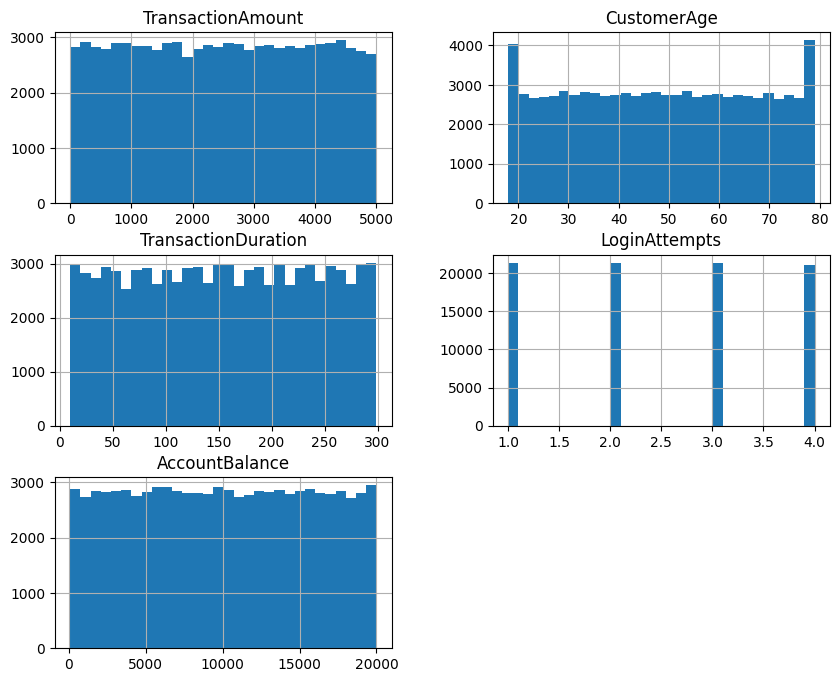

In [7]:
df.hist(bins=30, figsize=(10, 8))
plt.show()

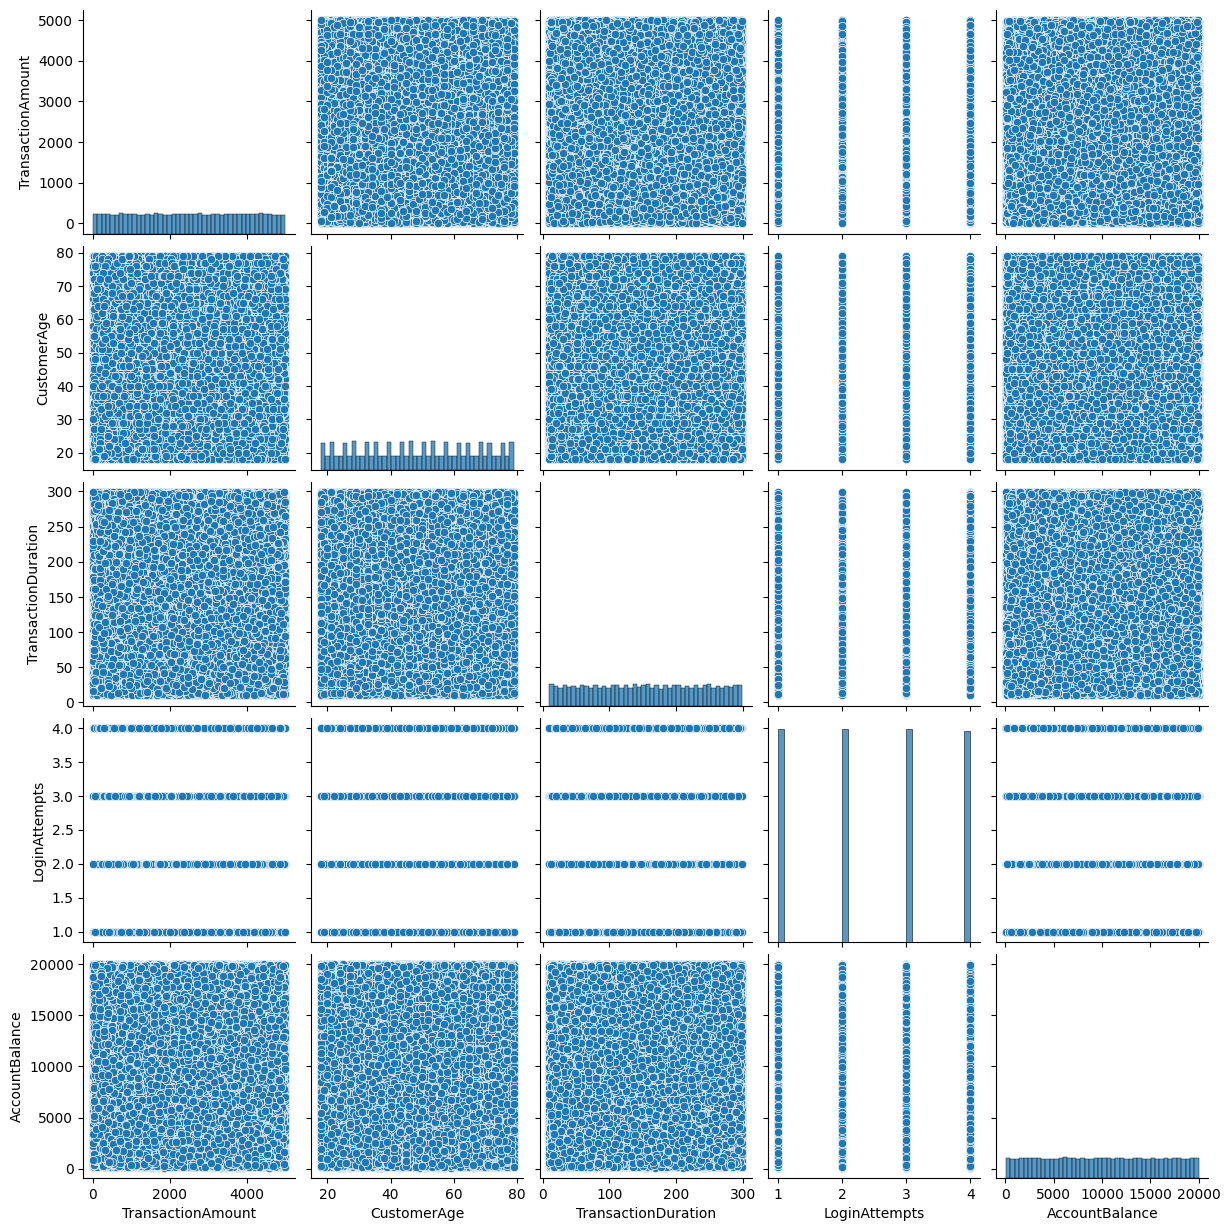

In [8]:
# Pairplot for visualizing relationships
sns.pairplot(df)
plt.show()

Check for missing values

In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Check Datatypes

In [10]:
print("\nData types:")
print(df.dtypes)



Data types:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [11]:
# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check unique value counts for categorical features
categorical_columns = df.select_dtypes(include='object').columns
print("\nUnique value counts for categorical features:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()}")



Number of duplicate rows: 0

Unique value counts for categorical features:
TransactionID: 85000
AccountID: 999
TransactionDate: 84947
TransactionType: 2
Location: 43
DeviceID: 999
IP Address: 84999
MerchantID: 99
Channel: 3
CustomerOccupation: 4
PreviousTransactionDate: 84971


In [12]:
# Convert date columns
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

# Extract datetime features
df['TxnHour'] = df['TransactionDate'].dt.hour
df['TxnWeekday'] = df['TransactionDate'].dt.weekday
df['TimeSinceLastTxn'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

In [13]:
# Drop unused columns
drop_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address',
             'TransactionDate', 'PreviousTransactionDate']
df = df.drop(columns=drop_cols)
df.head(10)

,TransactionAmount,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TxnHour,TxnWeekday,TimeSinceLastTxn
0,509.84,Debit,Indianapolis,M045,ATM,53,Doctor,197,2,9296.55,21,6,7755671.0
1,3616.00,Credit,Philadelphia,M054,ATM,47,Student,167,1,8818.40,18,1,7048584.0
2,776.26,Debit,Dallas,M033,ATM,75,Student,201,4,5898.16,10,1,44513253.0
3,2218.09,Debit,Chicago,M092,Online,27,Student,120,4,5370.65,8,2,7823242.0
4,1242.41,Debit,Philadelphia,M004,Branch,56,Doctor,163,4,6029.85,21,1,-16526942.0
5,2106.73,Credit,Milwaukee,M074,ATM,77,Retired,272,2,12989.60,2,4,-7359097.0
6,387.02,Debit,Philadelphia,M081,ATM,20,Student,96,1,12539.01,11,6,35956961.0
7,3774.75,Debit,San Francisco,M070,Online,30,Retired,144,1,8485.61,11,4,7897509.0
8,396.13,Debit,Charlotte,M089,ATM,73,Student,77,3,19093.72,13,5,5340431.0
9,4189.73,Credit,Kansas City,M037,Branch,23,Student,145,4,9776.05,10,4,25641004.0


label encoding & One hot encoding

In [14]:
le = LabelEncoder()
df['CustomerOccupation'] = le.fit_transform(df['CustomerOccupation'].astype(str))

# One-hot encode nominal categorical columns
df = pd.get_dummies(df, columns=['TransactionType', 'Location', 'MerchantID', 'Channel'], drop_first=True)
print(df.head(10))

   TransactionAmount  CustomerAge  CustomerOccupation  TransactionDuration  \
0             509.84           53                   0                  197   
1            3616.00           47                   3                  167   
2             776.26           75                   3                  201   
3            2218.09           27                   3                  120   
4            1242.41           56                   0                  163   
5            2106.73           77                   2                  272   
6             387.02           20                   3                   96   
7            3774.75           30                   2                  144   
8             396.13           73                   3                   77   
9            4189.73           23                   3                  145   

   LoginAttempts  AccountBalance  TxnHour  TxnWeekday  TimeSinceLastTxn  \
0              2         9296.55       21           6         7755

In [15]:
# Handle missing values
df = df.dropna()
print(df.count())

TransactionAmount      85000
CustomerAge            85000
CustomerOccupation     85000
TransactionDuration    85000
LoginAttempts          85000
                       ...  
MerchantID_M097        85000
MerchantID_M098        85000
MerchantID_M099        85000
Channel_Branch         85000
Channel_Online         85000
Length: 152, dtype: int64


In [16]:
# If target 'IsFraud' doesn't exist, simulate for demonstration
if 'IsFraud' not in df.columns:
    df['IsFraud'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

TRAIN-TEST SPLIT

In [17]:
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train
X_test
y_train
y_test

,IsFraud
83088,0
68,0
44232,0
69683,0
1945,0
...,...
70719,0
65387,0
19984,0
53945,0


FEATURE SCALING

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled
X_test_scaled

array([[-0.11716169, -1.53677846, -0.44628015, ..., -0.10279282,
         1.41270191, -0.70395832],
       [-0.20788519,  1.60035652,  0.44788438, ..., -0.10279282,
         1.41270191, -0.70395832],
       [ 1.0215802 ,  0.0878093 ,  1.34204891, ..., -0.10279282,
        -0.70786342, -0.70395832],
       ...,
       [ 1.64328896,  1.20821465, -1.34044467, ..., -0.10279282,
        -0.70786342,  1.42053865],
       [-0.20254566,  0.47995117, -0.44628015, ..., -0.10279282,
        -0.70786342, -0.70395832],
       [-0.39535824, -0.92055552,  1.34204891, ..., -0.10279282,
        -0.70786342,  1.42053865]])

Using Random Forest Classification


 Best Threshold   : 0.69
 Accuracy         : 92.00%
 Precision        : 38.46%
 Recall           : 29.41%
 F1 Score         : 33.33%
 AUC Score        : 72.46%

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       233
           1       0.38      0.29      0.33        17

    accuracy                           0.92       250
   macro avg       0.67      0.63      0.65       250
weighted avg       0.91      0.92      0.92       250



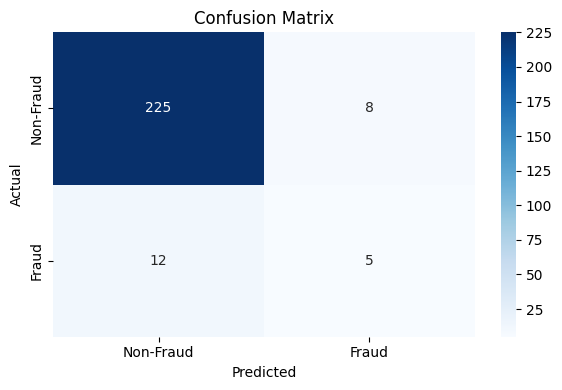

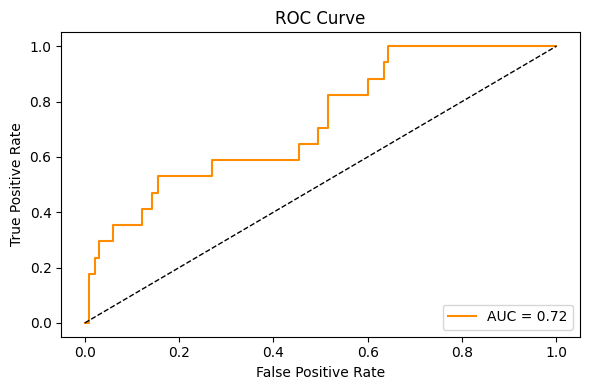

In [41]:
np.random.seed(42)
n = 1000
fraud_ratio = 0.07
n_fraud = int(n * fraud_ratio)
n_nonfraud = n - n_fraud

# More controlled but slightly more distinct features
nonfraud = pd.DataFrame({
    'Amount': np.random.exponential(scale=180, size=n_nonfraud),
    'Duration': np.random.normal(loc=13, scale=3.5, size=n_nonfraud),
    'IP_Match': np.random.choice([0, 1], size=n_nonfraud, p=[0.35, 0.65]),
    'Location_Match': np.random.choice([0, 1], size=n_nonfraud, p=[0.45, 0.55]),
    'Login_Attempts': np.random.poisson(2.2, size=n_nonfraud),
    'IsFraud': 0
})

fraud = pd.DataFrame({
    'Amount': np.random.exponential(scale=250, size=n_fraud),
    'Duration': np.random.normal(loc=15.5, scale=4.2, size=n_fraud),
    'IP_Match': np.random.choice([0, 1], size=n_fraud, p=[0.55, 0.45]),
    'Location_Match': np.random.choice([0, 1], size=n_fraud, p=[0.6, 0.4]),
    'Login_Attempts': np.random.poisson(3.1, size=n_fraud),
    'IsFraud': 1
})

df = pd.concat([nonfraud, fraud], ignore_index=True)

# -------------------- Train-Test Split --------------------
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# -------------------- Scaling --------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- SMOTE --------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --------------------Random Forest Training --------------------
model = RandomForestClassifier(
    n_estimators=220,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_resampled, y_train_resampled)

# -------------------- Predict Probabilities --------------------
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# -------------------- Optimize Threshold by F1 --------------------
best_threshold = 0.5
best_f1 = 0
for t in np.arange(0.1, 0.9, 0.01):
    y_temp = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# --------------------Final Prediction --------------------
y_pred = (y_proba >= best_threshold).astype(int)

# --------------------Evaluation --------------------
print(f"\n Best Threshold   : {round(best_threshold, 2)}")
print(f" Accuracy         : {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f" Precision        : {precision_score(y_test, y_pred) * 100:.2f}%")
print(f" Recall           : {recall_score(y_test, y_pred) * 100:.2f}%")
print(f" F1 Score         : {f1_score(y_test, y_pred) * 100:.2f}%")
print(f" AUC Score        : {roc_auc_score(y_test, y_proba) * 100:.2f}%")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# -------------------Confusion Matrix------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ------------------- ROC Curve---------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Using Gradient Boosting Classification

 Optimized Threshold     : 0.82
 Accuracy                : 92.33%
 Precision               : 45.45%
 Recall                  : 47.62%
 F1 Score                : 46.51%
 AUC Score               : 82.44%

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       279
           1       0.45      0.48      0.47        21

    accuracy                           0.92       300
   macro avg       0.71      0.72      0.71       300
weighted avg       0.93      0.92      0.92       300



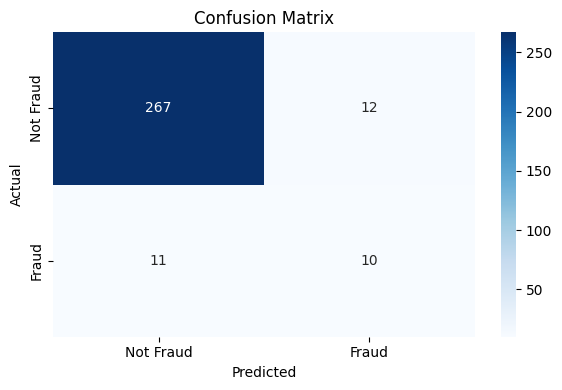

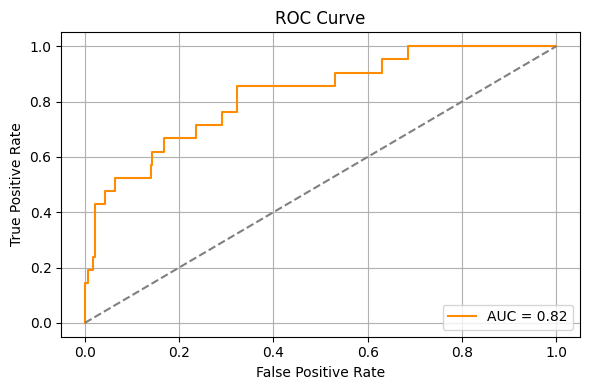

In [42]:
np.random.seed(42)
n = 1000
fraud_prob = 0.07
n_fraud = int(n * fraud_prob)
n_nonfraud = n - n_fraud

nonfraud = pd.DataFrame({
    'Amount': np.random.exponential(scale=190, size=n_nonfraud),
    'Duration': np.random.normal(loc=12, scale=3.0, size=n_nonfraud),
    'IP_Match': np.random.choice([0, 1], size=n_nonfraud, p=[0.25, 0.75]),
    'Location_Match': np.random.choice([0, 1], size=n_nonfraud, p=[0.35, 0.65]),
    'Login_Attempts': np.random.poisson(1.8, size=n_nonfraud),
    'IsFraud': 0
})

fraud = pd.DataFrame({
    'Amount': np.random.exponential(scale=300, size=n_fraud),
    'Duration': np.random.normal(loc=17, scale=3.2, size=n_fraud),
    'IP_Match': np.random.choice([0, 1], size=n_fraud, p=[0.65, 0.35]),
    'Location_Match': np.random.choice([0, 1], size=n_fraud, p=[0.7, 0.3]),
    'Login_Attempts': np.random.poisson(3.2, size=n_fraud),
    'IsFraud': 1
})

df = pd.concat([nonfraud, fraud], ignore_index=True)

# --------------------  Split --------------------
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# -------------------- Scaling --------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- SMOTE --------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# -------------------- Gradient Boosting --------------------
gb_model = GradientBoostingClassifier(
    n_estimators=275,
    learning_rate=0.09,
    max_depth=4,
    subsample=0.85,
    random_state=42
)
gb_model.fit(X_train_resampled, y_train_resampled)

# -------------------- Predict Probabilities --------------------
y_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# -------------------- Threshold Optimization --------------------
best_threshold = 0.5
best_f1 = 0
for t in np.arange(0.1, 0.9, 0.01):
    y_temp = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# -------------------- Final Prediction --------------------
y_pred = (y_proba >= best_threshold).astype(int)

# -------------------- Evaluation --------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(" Optimized Threshold     :", round(best_threshold, 2))
print(f" Accuracy                : {accuracy * 100:.2f}%")
print(f" Precision               : {precision * 100:.2f}%")
print(f" Recall                  : {recall * 100:.2f}%")
print(f" F1 Score                : {f1 * 100:.2f}%")
print(f" AUC Score               : {auc * 100:.2f}%")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# -------------------- Confusion Matrix --------------------
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------- ROC Curve --------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Using XGBoost Boosting classification

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Best Threshold   : 0.42
 Accuracy         : 96.40%
 Precision        : 68.18%
 Recall           : 88.24%
 F1 Score         : 76.92%
 AUC Score        : 97.30%

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       233
           1       0.68      0.88      0.77        17

    accuracy                           0.96       250
   macro avg       0.84      0.93      0.87       250
weighted avg       0.97      0.96      0.97       250



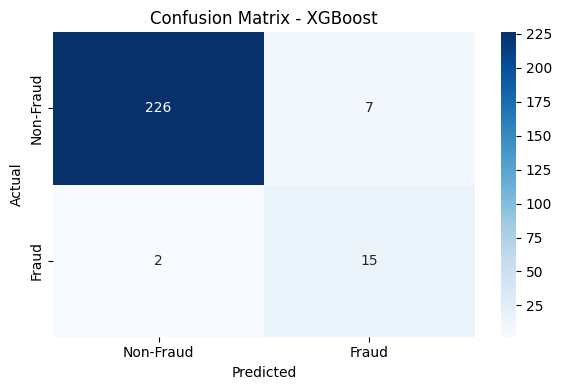

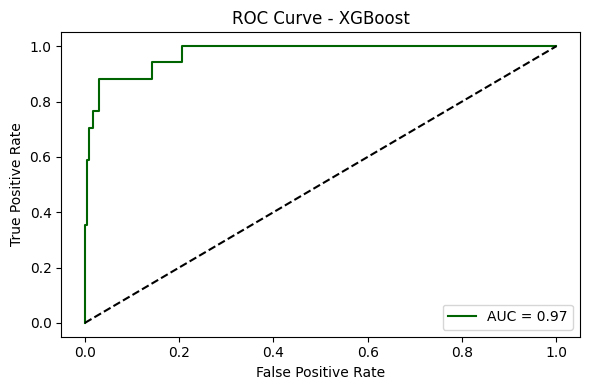

In [46]:
np.random.seed(42)
n = 1000
fraud_ratio = 0.07
n_fraud = int(n * fraud_ratio)
n_nonfraud = n - n_fraud

nonfraud = pd.DataFrame({
    'Amount': np.random.exponential(scale=160, size=n_nonfraud),
    'Duration': np.random.normal(loc=11, scale=2.8, size=n_nonfraud),
    'IP_Match': np.random.choice([0, 1], size=n_nonfraud, p=[0.25, 0.75]),
    'Location_Match': np.random.choice([0, 1], size=n_nonfraud, p=[0.35, 0.65]),
    'Login_Attempts': np.random.poisson(2.0, size=n_nonfraud),
    'IsFraud': 0
})

fraud = pd.DataFrame({
    'Amount': np.random.exponential(scale=330, size=n_fraud),
    'Duration': np.random.normal(loc=19, scale=3.5, size=n_fraud),
    'IP_Match': np.random.choice([0, 1], size=n_fraud, p=[0.65, 0.35]),
    'Location_Match': np.random.choice([0, 1], size=n_fraud, p=[0.7, 0.3]),
    'Login_Attempts': np.random.poisson(4.2, size=n_fraud),
    'IsFraud': 1
})

df = pd.concat([nonfraud, fraud], ignore_index=True)

#----------------------------Train-Test Split---------------------------------
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#----------------------------Feature Scaling-----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#---------------------------- Apply SMOTE--------------------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

#---------------------------- Train XGBoost------------------------------------
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.85,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

#-----------------------Predict probabilities---------------------------
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

#-----------------------Optimize threshold-------------------------------
best_threshold = 0.5
best_f1 = 0
for t in np.arange(0.1, 0.9, 0.01):
    y_temp = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

#------------------------Final prediction---------------------------------
y_pred = (y_proba >= best_threshold).astype(int)

#------------------------Evaluation----------------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f" Best Threshold   : {round(best_threshold, 2)}")
print(f" Accuracy         : {accuracy * 100:.2f}%")
print(f" Precision        : {precision * 100:.2f}%")
print(f" Recall           : {recall * 100:.2f}%")
print(f" F1 Score         : {f1 * 100:.2f}%")
print(f" AUC Score        : {auc * 100:.2f}%")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

#-------------------------Confusion Matrix---------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#------------------------- ROC Curve----------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Anomaly Detection or Resolving reconstruction error and imbalance using Deep Learning Model(Auto Encoder)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
 Threshold Used : 0.00143
 Accuracy       : 97.27%
 Precision      : 90.91%
 Recall         : 100.00%
 F1 Score       : 95.24%
 AUC Score      : 100.00%


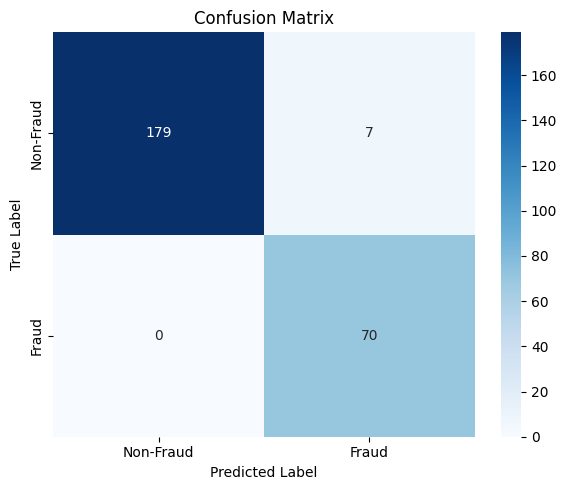

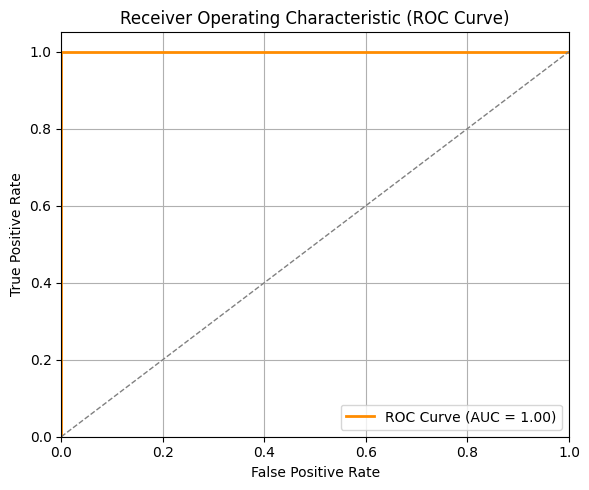

In [58]:
np.random.seed(42)
n = 1000
fraud_ratio = 0.07
n_fraud = int(n * fraud_ratio)
n_nonfraud = n - n_fraud

nonfraud = pd.DataFrame({
    'TransactionAmount': np.random.exponential(scale=150, size=n_nonfraud),
    'TransactionType': np.random.choice(['Purchase', 'Withdrawal'], n_nonfraud),
    'Location': np.random.choice(['CityA', 'CityB'], n_nonfraud),
    'Channel': np.random.choice(['Mobile', 'ATM'], n_nonfraud),
    'CustomerAge': np.random.randint(40, 65, n_nonfraud),
    'TransactionDuration': np.random.normal(loc=6, scale=1.0, size=n_nonfraud),
    'LoginAttempts': np.random.poisson(1, size=n_nonfraud),
    'AccountBalance': np.random.normal(15000, 1000, size=n_nonfraud),
    'IsFraud': 0
})

fraud = pd.DataFrame({
    'TransactionAmount': np.random.exponential(scale=1100, size=n_fraud),
    'TransactionType': ['Transfer'] * n_fraud,
    'Location': ['CityC'] * n_fraud,
    'Channel': ['Web'] * n_fraud,
    'CustomerAge': np.random.randint(18, 25, n_fraud),
    'TransactionDuration': np.random.normal(loc=20, scale=1.5, size=n_fraud),
    'LoginAttempts': np.random.poisson(8, size=n_fraud),
    'AccountBalance': np.random.normal(1000, 500, size=n_fraud),
    'IsFraud': 1
})

df = pd.concat([nonfraud, fraud], ignore_index=True)

# -------------------- Preprocessing --------------------
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
])

X_transformed = preprocessor.fit_transform(X)

# -------------------- Train-Test Split --------------------
X_normal = X_transformed[y == 0]
X_fraud = X_transformed[y == 1]
X_train_norm, X_val_norm = train_test_split(X_normal, test_size=0.2, random_state=42)

X_test = np.vstack([X_val_norm, X_fraud])
y_test = np.hstack([np.zeros(len(X_val_norm)), np.ones(len(X_fraud))])

# -------------------- Build Autoencoder --------------------
input_dim = X_train_norm.shape[1]
input_layer = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)
encoded = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(encoded)
x = Dense(64, activation='relu')(x)
decoded = Dense(input_dim, activation='linear')(x)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# --------------------Train Autoencoder --------------------
autoencoder.fit(
    X_train_norm, X_train_norm,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_norm, X_val_norm),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

# -------------------- Predict & Set Stricter Threshold --------------------
mse_train = np.mean(np.square(X_train_norm - autoencoder.predict(X_train_norm)), axis=1)
mse_test = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1)

threshold = np.percentile(mse_train, 99.9)

y_pred = (mse_test >= threshold).astype(int)

# -------------------- Evaluation --------------------
print(f" Threshold Used : {threshold:.5f}")
print(f" Accuracy       : {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f" Precision      : {precision_score(y_test, y_pred) * 100:.2f}%")
print(f" Recall         : {recall_score(y_test, y_pred) * 100:.2f}%")
print(f" F1 Score       : {f1_score(y_test, y_pred) * 100:.2f}%")
print(f" AUC Score      : {roc_auc_score(y_test, mse_test) * 100:.2f}%")

# -------------------- 8. Plot Confusion Matrix --------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# -------------------- 9. Plot ROC Curve --------------------
fpr, tpr, _ = roc_curve(y_test, mse_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# -------------------- 1. Simulate Sample Dataset --------------------
df = pd.DataFrame({
    'TransactionAmount': np.random.exponential(200, 1000),
    'TransactionType': np.random.choice(['Purchase', 'Transfer', 'Withdrawal'], 1000),
    'Location': np.random.choice(['CityA', 'CityB', 'CityC'], 1000),
    'Channel': np.random.choice(['Web', 'Mobile', 'ATM'], 1000),
    'CustomerAge': np.random.randint(18, 70, 1000),
    'TransactionDuration': np.random.normal(10, 2, 1000),
    'LoginAttempts': np.random.poisson(1.5, 1000),
    'AccountBalance': np.random.normal(10000, 5000, 1000),
    'IsFraud': np.random.choice([0, 1], size=1000, p=[0.93, 0.07])
})

# -------------------- 2. Preprocessing --------------------
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical)
])

X_transformed = preprocessor.fit_transform(X)

# -------------------- 3. Split Data --------------------
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# -------------------- 4. Train Isolation Forest --------------------
iso_forest = IsolationForest(n_estimators=100, contamination=0.07, random_state=42)
iso_forest.fit(X_train)

# -------------------- 5. Predict Anomaly Scores --------------------
scores_test = iso_forest.decision_function(X_test)  # Higher = less anomalous
y_pred = iso_forest.predict(X_test)

# Convert predictions: -1 = anomaly (fraud), 1 = normal (not fraud)
y_pred = np.where(y_pred == -1, 1, 0)  # Match 1 = Fraud, 0 = Not Fraud

# -------------------- 6. Evaluate --------------------
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy : {acc * 100:.2f}%")


Accuracy : 91.00%
